# Retrieve data

In [73]:
import pandas as pd

# Load the dataframes from the CSV files
df_combined_vs = pd.read_csv('Combined_vs.csv', delimiter=';')
df_mcts_vs = pd.read_csv('MCTS_vs.csv', delimiter=';')
df_minimax_vs = pd.read_csv('MiniMax_vs.csv', delimiter=';')
df_logic_vs = pd.read_csv('Logic_vs.csv', delimiter=';')
df_random_vs = pd.read_csv('Random_vs.csv', delimiter=';')

# Merge the dataframes in a single one with only the common columns
common_cols = []
for col in df_combined_vs.columns:
    if col in df_mcts_vs.columns and col in df_minimax_vs.columns and col in df_logic_vs.columns and col in df_random_vs.columns:
        common_cols.append(col)
df = pd.concat(
    objs=[df_combined_vs[common_cols], df_mcts_vs[common_cols], df_minimax_vs[common_cols], df_logic_vs[common_cols], df_random_vs[common_cols]],
    ignore_index=True
)

df

,agent0,agent1,N_BATTLES,winrate,avg_n_turns,avg_n_switches,avg_hp_residue
0,Combined,Random,100,63.00,10.86,0.00,30.42
1,Combined,Random,300,63.33,10.93,0.00,32.34
2,Combined,Logic,100,68.00,11.69,0.00,33.72
3,Combined,Logic,300,69.67,11.61,0.00,36.89
4,MCTS,Combined,100,52.00,10.48,1.00,23.49
5,MCTS,MiniMax,100,76.00,10.70,0.89,38.10
6,MCTS,MCTS,100,62.00,10.61,0.84,27.99
7,MCTS,Combined,300,56.33,10.37,0.91,26.19
8,MCTS,MCTS,300,58.00,10.53,0.99,25.86
9,MCTS,MiniMax,300,60.33,11.06,0.82,28.09


# Winrate tables

In [74]:

index_dict = {
    'Random': 0,
    'Logic': 1,
    'MiniMax': 2,
    'MCTS': 3,
    'Combined': 4
}
df_table_100 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())
df_table_300 = pd.DataFrame(index=index_dict.keys(), columns=index_dict.keys())

# Generate a dataframe with the winrate associated to all the combinations of battles
for agent in index_dict.keys():
    print('\n\n' + agent + ':')
    for opponent in index_dict.keys():
        if agent == opponent:
            df_table_100.loc[agent][opponent] = -1
            df_table_300.loc[agent][opponent] = -1
            continue
        condition = (df['agent0'] == agent) & (df['agent1'] == opponent)
        if df[condition].shape[0] > 0:
            print(f'agent0={agent}, agent1={opponent}')
            agent0 = agent
            agent1 = opponent
            complementary_winrate = False
            query = (df['agent0'] == agent0) & (df['agent1'] == agent1)
        else:
            print(f'agent0={opponent}, agent1={agent}')
            agent0 = opponent
            agent1 = agent
            complementary_winrate = True
            query = (df['agent0'] == agent0) & (df['agent1'] == agent1)
        # Winrate for 100 battles
        row = df[query & (df['N_BATTLES'] == 100)]
        print('-----------------------')
        print(agent0, agent1)
        print(row)
        winrate = float(row['winrate'].values[0])
        df_table_100.loc[agent][opponent] = winrate if not complementary_winrate else 100 - winrate
        # Winrate for 300 battles
        row = df[query & (df['N_BATTLES'] == 300)]
        print(row)
        print('-----------------------')
        winrate = float(row['winrate'].values[0])
        df_table_300.loc[agent][opponent] = winrate if not complementary_winrate else 100 - winrate




Random:
agent0=Logic, agent1=Random
-----------------------
Logic Random
   agent0  agent1  N_BATTLES  winrate  avg_n_turns  avg_n_switches  \
23  Logic  Random        100     71.0         10.1            0.79   

    avg_hp_residue  
23           39.73  
   agent0  agent1  N_BATTLES  winrate  avg_n_turns  avg_n_switches  \
22  Logic  Random        300     74.0         10.4            0.72   

    avg_hp_residue  
22           38.06  
-----------------------
agent0=MiniMax, agent1=Random
-----------------------
MiniMax Random
     agent0  agent1  N_BATTLES  winrate  avg_n_turns  avg_n_switches  \
14  MiniMax  Random        100     47.0        14.13            0.64   

    avg_hp_residue  
14           21.38  
     agent0  agent1  N_BATTLES  winrate  avg_n_turns  avg_n_switches  \
15  MiniMax  Random        300    44.67        13.04             0.9   

    avg_hp_residue  
15           20.41  
-----------------------
agent0=MCTS, agent1=Random
-----------------------
MCTS Random
   ag

C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\2416325314.py:16: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_table_100.loc[agent][opponent] = -1
C:\Users\Gianluca\AppData\Local\Temp\ipykernel_372632\2416325314.py:17: FutureWarnin

### Winrate table with 100 battles

In [75]:
df_table_100

,Random,Logic,MiniMax,MCTS,Combined
Random,-1,29.0,53.0,24.0,37.0
Logic,71.0,-1,33.0,29.0,32.0
MiniMax,47.0,67.0,-1,24.0,31.0
MCTS,76.0,71.0,76.0,-1,52.0
Combined,63.0,68.0,69.0,48.0,-1


### Winrate table with 300 battles

In [76]:
df_table_300

,Random,Logic,MiniMax,MCTS,Combined
Random,-1,26.0,55.33,29.33,36.67
Logic,74.0,-1,31.0,23.67,30.33
MiniMax,44.67,69.0,-1,39.67,29.67
MCTS,70.67,76.33,60.33,-1,56.33
Combined,63.33,69.67,70.33,43.67,-1


# Winrate diagram vs Random agent

### Winrate diagram of each agent vs Random agent (over 100 battles)

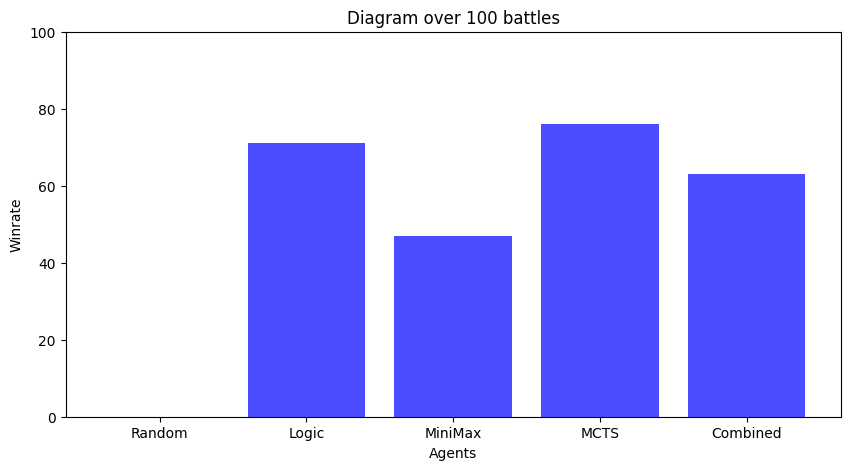

In [77]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.bar(df_table_100.columns, df_table_100['Random'], color='blue', alpha=0.7)
plt.title('Diagram over 100 battles')
plt.xlabel('Agents')
plt.ylabel('Winrate')
plt.ylim(0, 100)
plt.show()

### Winrate diagram of each agent vs Random agent (over 300 battles)

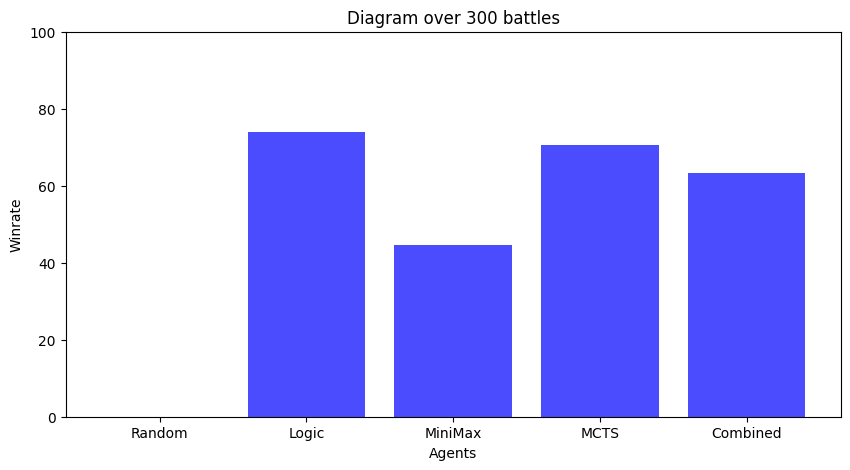

In [78]:
plt.figure(figsize=(10, 5))
plt.bar(df_table_300.columns, df_table_300['Random'], color='blue', alpha=0.7)
plt.title('Diagram over 300 battles')
plt.xlabel('Agents')
plt.ylabel('Winrate')
plt.ylim(0, 100)
plt.show()